In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#importing file
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\train (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
#missing value computation
df['Embarked'].fillna(0, inplace = True)
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.Title.value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Don               1
Ms                1
Capt              1
Mme               1
Sir               1
Lady              1
the Countess      1
Name: Title, dtype: int64

In [22]:
#feature engg
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1 #initialize to yes/1 is alone
df['IsAlone'].loc[df['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
df["Age"] = df.groupby("Title")["Age"].transform(lambda x: x.fillna(x.median()))

In [23]:
#mapping cat_variable
df.Title = df.Title.map({'Mr' :1,'Miss':2, 'Mrs':3,'Master':4,'Col':5, 'Rev':6, 'Dr':7, 'Don':8,'Ms':9, 'Mlle':10 ,'Major':11, 'the Countess':12, 'Jonkheer':13,'Mme':14,'Sir':15,'Capt':16, 'Lady':17})

In [24]:
#remove unwanted columns
df = df.drop(['Name', 'Ticket', 'Cabin'],axis =1)

In [25]:
df.Embarked = df.Embarked.ffill()

In [26]:
#target variable
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

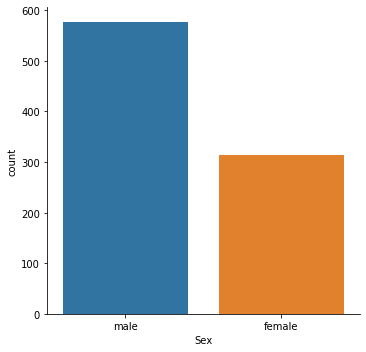

In [27]:
#check Gender wise Survival remenber 1 = Male, 2 = Female
sns.factorplot('Sex',data=df,kind='count')

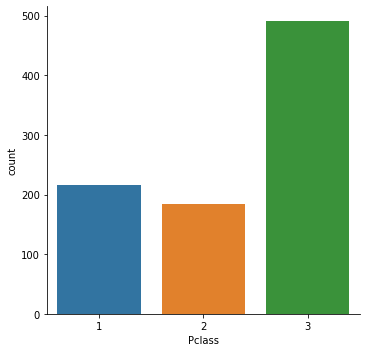

In [29]:
# passenger class wise survival
sns.factorplot('Pclass',data=df,kind='count')

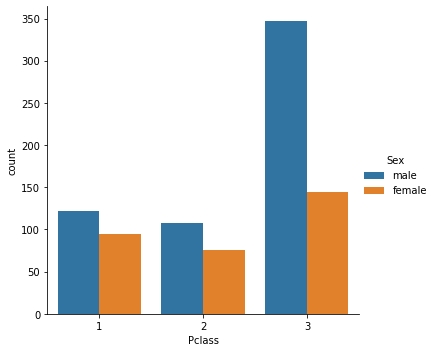

In [31]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

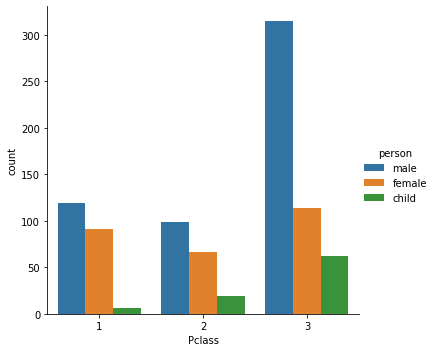

In [34]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)
sns.factorplot('Pclass',data=df,hue='person',kind='count')

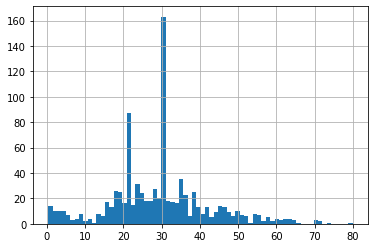

In [37]:
#age of Passengers
df['Age'].hist(bins=70)

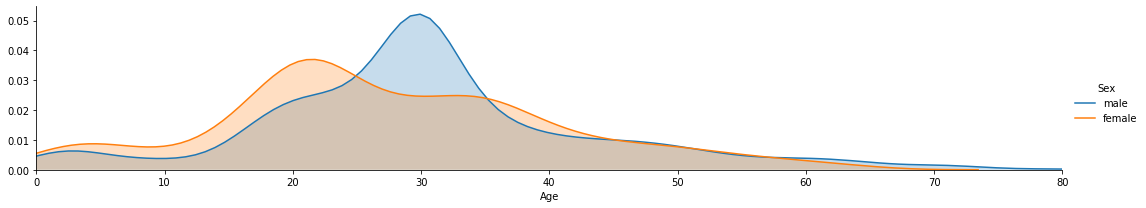

In [40]:
as_fig = sns.FacetGrid(df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

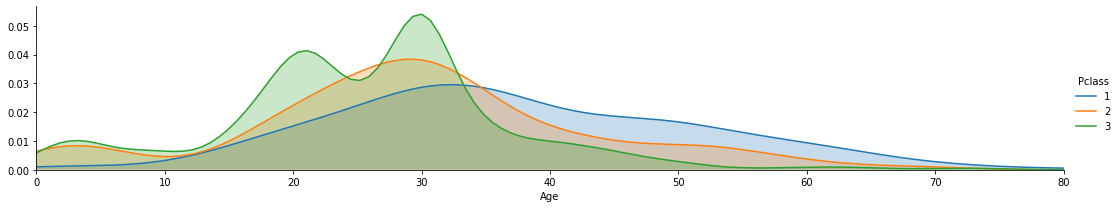

In [42]:
#passenger class
as_fig = sns.FacetGrid(df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

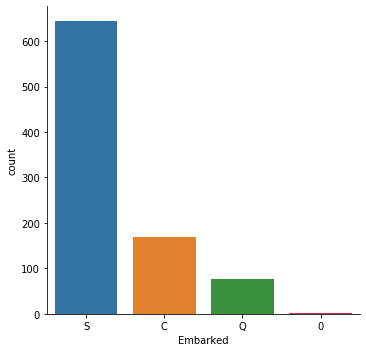

In [45]:
#embarkment
sns.factorplot('Embarked',data=df,kind='count')

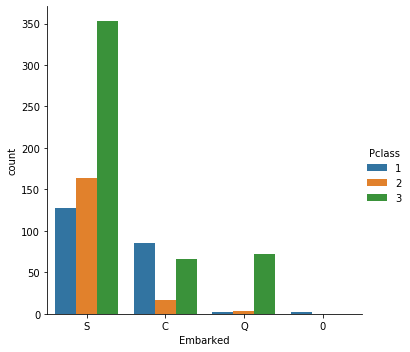

In [46]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

In [50]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,person
0,1,0,3,male,22.0,1,0,7.2500,S,1,2,0,male
1,2,1,1,female,38.0,1,0,71.2833,C,3,2,0,female
2,3,1,3,female,26.0,0,0,7.9250,S,2,1,1,female
3,4,1,1,female,35.0,1,0,53.1000,S,3,2,0,female
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,1,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,6,1,1,male
887,888,1,1,female,19.0,0,0,30.0000,S,2,1,1,female
888,889,0,3,female,21.0,1,2,23.4500,S,2,4,0,female
889,890,1,1,male,26.0,0,0,30.0000,C,1,1,1,male


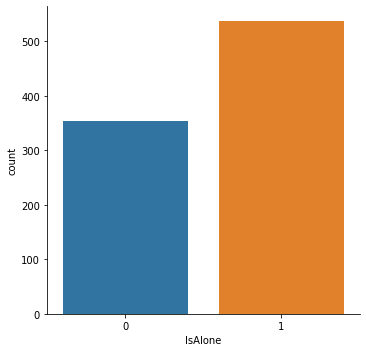

In [52]:
#Let us visualise the IsAlone column

sns.factorplot('IsAlone',kind='count',data=df)

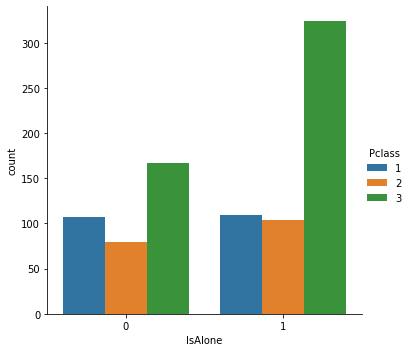

In [55]:
#p class wise alone passengers
sns.factorplot('IsAlone',kind='count',data=df,hue='Pclass')

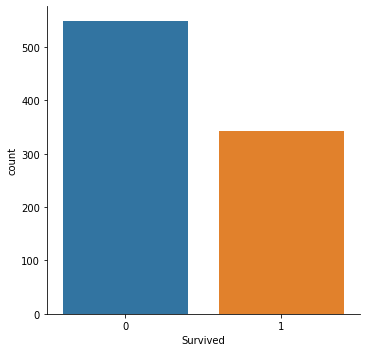

In [56]:
sns.factorplot('Survived',data=df,kind='count')

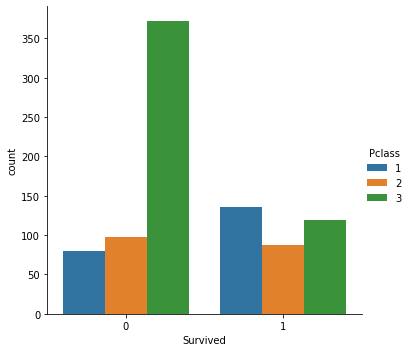

In [57]:
# relation between Pclass and survival
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')